In [321]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets
import altair as alt
alt.renderers.enable('notebook')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['combats.csv', 'pokemon.csv', 'tests.csv']


In [322]:
#load data
data = pd.read_csv("../input/pokemon.csv", skipinitialspace=True)

<h1>Learning Details About Dataframe</h1>

In [323]:
#print out top 5 data from dataframe
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [324]:
#check info about the dataframe
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
#             800 non-null int64
Name          799 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 69.6+ KB


Above infos tell us:
<li>We have 800 rows of data</li>
<li>We have 12 columns</li>
<li>We have 1 boolean variable, 8 integer variables, and 3 objects</li>
<li>We only have null varibles from Name and Type 2 columns</li>
<li>Dataset size is 69.6+ KB</li>

In [325]:
#check NaN values
data.isnull().sum()

#               0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

We have 1 null value from Name column and 386 null values from Type 2 column

In [326]:
#we can drop NaN values from our dataframe
data = data.dropna()

In [327]:
data.isnull().sum()

#             0
Name          0
Type 1        0
Type 2        0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

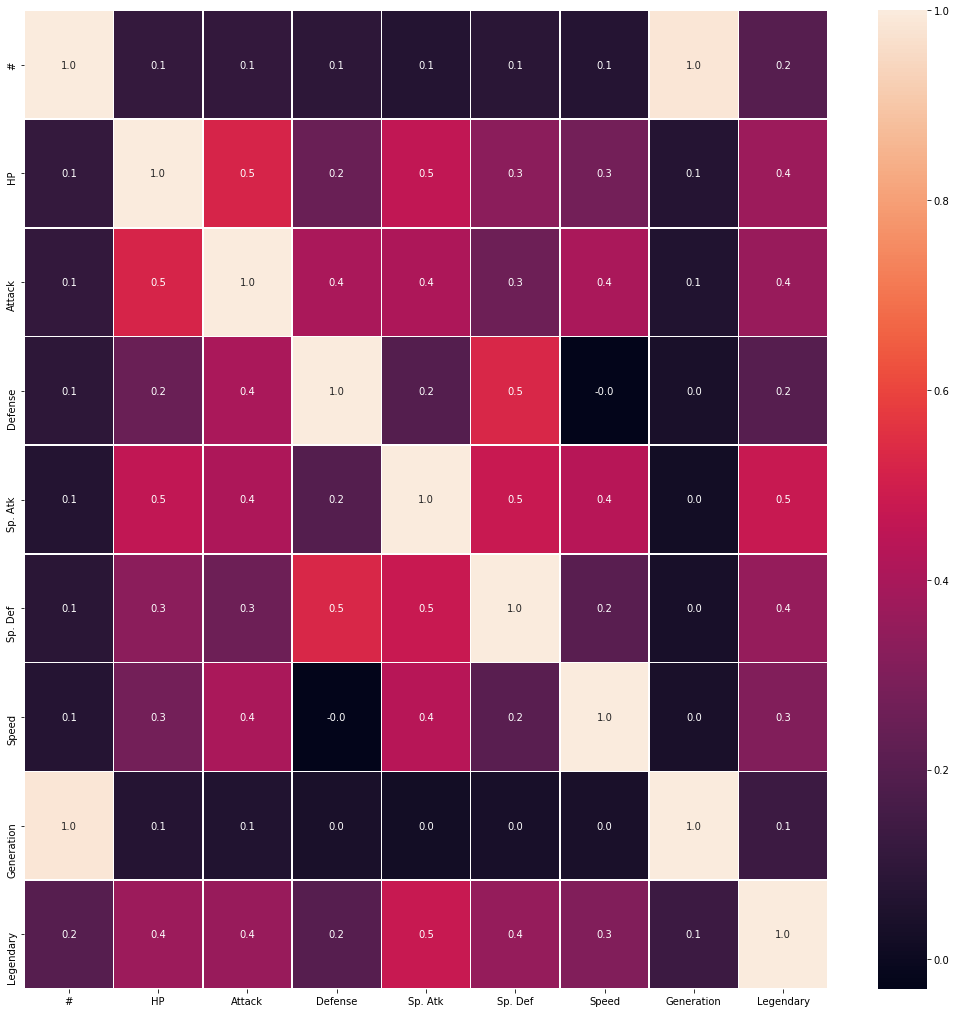

In [328]:
#correlation between features
f, ax = plt.subplots(figsize = (18, 18))
sns.heatmap(data.corr(), annot = True, linewidth = .5, fmt = ".1f", ax = ax)
plt.show() 

higher correlation means higher proportion between  features 

if correlation is positive then we can give this example: if the quantity of a room in a house increase, then the price of the house also increase.




<h1>Virtualization and Analysing</h1>

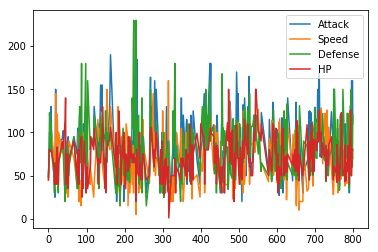

In [329]:
data1 = data.loc[:, ["Attack", "Speed", "Defense", "HP"]]
data1.plot()
plt.show()

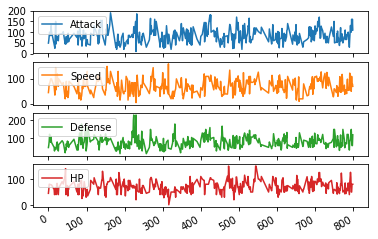

In [330]:
data1.plot(subplots = True)
plt.show()

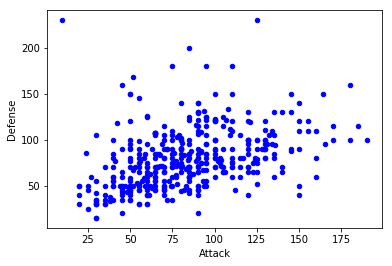

In [331]:
#we can also use scatter graph
data.plot(kind = "scatter", x = "Attack", y = "Defense", color = "b", linewidth = 1)
plt.xlabel("Attack")
plt.ylabel("Defense")
plt.show()

from above graph:
<li>Most of the attack power gather around 50-100</li>
<li>Most of the defense power gather around 50-100</li>
<li>We have some exaggeration attack values which are greater than 175</li>
<li>We have some exaggeration defense values which are greater than 200</li>



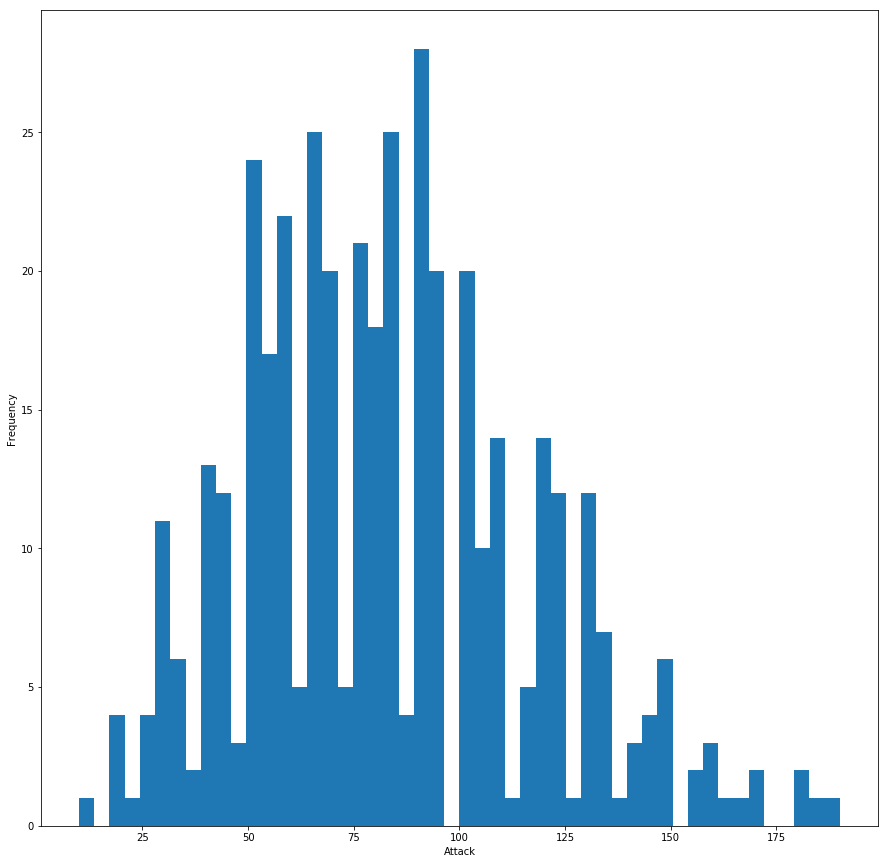

In [332]:
#we can plot histogram graph
data.Attack.plot(kind = "hist", bins = 50, figsize = (15, 15))
plt.xlabel("Attack")
plt.show()

In [333]:
#we can see count, mean, std, min, max values of numeric data
data.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,415.456522,70.649758,83.173913,79.676329,77.048309,75.565217,70.514493,3.410628
std,235.907863,22.896557,33.698473,32.593788,33.805061,27.949961,28.521408,1.663010
min,1.000000,1.000000,10.000000,15.000000,10.000000,20.000000,5.000000,1.000000
25%,221.500000,55.000000,59.250000,55.000000,50.000000,55.000000,50.000000,2.000000
50%,416.000000,70.000000,80.000000,75.500000,70.000000,75.000000,70.000000,3.000000
75%,622.750000,85.000000,103.000000,100.000000,100.000000,94.750000,91.000000,5.000000
max,800.000000,150.000000,190.000000,230.000000,180.000000,230.000000,160.000000,6.000000


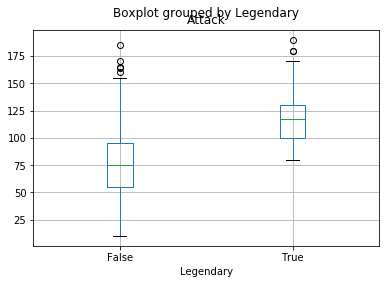

In [334]:
#we can also plot outlier 
data.boxplot(column = "Attack", by = "Legendary")
plt.show()

<p>black circles are representing outliers</p>

In [335]:
@ipywidgets.interact
def plot(color = ['red', 'steelblue', 'green', 'blue']):
    (sns.barplot(y = 'Name', x = 'Attack', data = data.head(10), orient = 'h', color = color))

interactive(children=(Dropdown(description='color', options=('red', 'steelblue', 'green', 'blue'), value='red'…

In [336]:
#we can also create pivot table
pd.pivot_table(data,index=["Name"])


,#,Attack,Defense,Generation,HP,Legendary,Sp. Atk,Sp. Def,Speed
Name,,,,,,,,,
Abomasnow,511,92,75,4,90,False,92,85,60
Aegislash Blade Forme,751,150,50,6,60,False,150,50,60
Aegislash Shield Forme,752,50,150,6,60,False,50,150,60
Aerodactyl,154,105,65,1,80,False,60,75,130
Aggron,333,110,180,3,70,False,60,60,50
Altaria,366,70,90,3,75,False,70,105,80
Amaura,769,59,50,6,77,False,67,63,46
Amoonguss,653,85,70,5,114,False,85,80,30
Anorith,380,95,50,3,45,False,40,50,75


<p>Before feeding KNN Classifier with our data, we have to do some removing and categorizing</p>

In [337]:
#we have to remove Name
data = data.drop('Name', axis = 1)

In [338]:
#we have to give numerical values to Legendary column
data.iloc[:, 5:6] = data.iloc[:, 5:6].apply(LabelEncoder().fit_transform)


In [339]:
from collections import Counter
count  = pd.Series(data['Type 1'].str.replace('[\[\]\']','').str.split(',').map(Counter).sum())
ln_list = range(0, len(count))
categorize = list(ln_list)
type(categorize[0])


int

In [340]:
#we also have to categorize Type 1 and Type 2
#data['Type 1'] = pd.Categorical(data['Type 1'], categories= data['Type 1'].unique()).codes
        

In [341]:
data.iloc[:, 1:3] = data.iloc[:, 1:3].apply(LabelEncoder().fit_transform)
data.head()


,#,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,9,13,45,49,16,65,65,45,1,False
1,2,9,13,60,62,26,80,80,60,1,False
2,3,9,13,80,82,40,100,100,80,1,False
3,4,9,13,80,100,71,122,120,80,1,False
6,7,6,7,78,84,37,109,85,100,1,False


In [342]:
data = data.drop('#', axis = 1)

In [343]:
#assign target value
target = data['Legendary']
#drop target value from the dataframe
data = data.drop('Legendary', axis = 1)


In [354]:
#create KNN object
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(data, target)
KNeighborsClassifier(algorithm = 'auto', leaf_size = 30, 
                    metric = "minkowski", metric_params = None, n_jobs = None, 
                    n_neighbors = 5, p = 2, weights = 'uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [355]:
poke = [157,133,30,70,120,100,135,95, 0]
poke = np.array(poke).reshape(1, -1)
poke

array([[157, 133,  30,  70, 120, 100, 135,  95,   0]])

In [356]:
prediction = knn.predict(poke)
result = 'Legendary' if prediction == True else 'Not Legendary'
print(result)


Not Legendary
